## 安裝 plotly

In [1]:
! pip install plotly

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Scatter Plot

In [1]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [2]:
np.random.seed(42)
np.random.randint(1,42,6)

array([39, 29, 15,  8, 21, 39])

In [3]:
np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

In [4]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
    )
]


In [6]:
pyo.iplot(data, filename='scatter1.html')

In [7]:
layout = go.Layout(
    title = 'Random Data Scatterplot',
    xaxis = dict(title = 'Some random x-values'),
    yaxis = dict(title = 'Some random y-values'),
    hovermode ='closest' 
)


In [8]:
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='scatter2.html')

In [9]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
        marker = dict(      
            size = 12,
            color = 'rgb(51,204,153)',
            symbol = 'pentagon',
            line = dict(
            width = 2,
            )
        )
    )
]


In [10]:
?pyo.plot
?pyo.iplot

In [11]:
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='scatter3.html')

## Line Plot

In [12]:
import pandas as pd
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [13]:
data = []
for col in df.columns:
    data.append({'x':df.index, 'y':df[col], 'name':col})

In [15]:
pyo.iplot(data)

In [16]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/nst-est2017-alldata.csv')

In [17]:
df2 = df[df['DIVISION']=='1']
df2.set_index('NAME', inplace=True)
df2 = df2[[col for col in df2.columns if col.startswith('POP')]]
df2.head()

POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
NAME                                                               
Connecticut          3580171.0        3591927.0        3597705.0   
Maine                1327568.0        1327968.0        1328101.0   
Massachusetts        6564943.0        6612178.0        6659627.0   
New Hampshire        1316700.0        1318345.0        1320923.0   
Rhode Island         1053169.0        1052154.0        1052761.0   

               POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
NAME                                                               
Connecticut          3602470.0        3600188.0        3593862.0   
Maine                1327975.0        1328903.0        1327787.0   
Massachusetts        6711138.0        6757925.0        6794002.0   
New Hampshire        1322622.0        1328684.0        1330134.0   
Rhode Island         1052784.0        1054782.0        1055916.0   

               POPESTIMATE2016  POPESTIMATE2017  
NAME                                             
Connecticut          3587685.0        3588184.0  
Maine                1330232.0        1335907.0  
Massachusetts        6823721.0        6859819.0  
New Hampshire        1335015.0        1342795.0  
Rhode Island         1057566.0        1059639.0

In [18]:
traces=[
    go.Scatter(
        x = df2.columns,
        y = df2.loc[name],
        mode = 'markers+lines',
        name = name
) for name in df2.index]


In [19]:
pyo.iplot(traces)

In [20]:
layout = go.Layout(
    title = 'Population Estimates of the Six New England States'
)

fig = go.Figure(data=traces,layout=layout)
pyo.iplot(fig, filename='line3.html')


## Area Chart

In [21]:
month  = [1,2,3,4,5]
taipei = [92.5,132.6,168.8,159.1,218.7]
tainan = [21.2, 30.6, 37.3, 84.6, 184.3]


In [22]:
trace1 = go.Scatter(
    x=month,
    y=taipei,
    fill='tozeroy'
)

trace2 = go.Scatter(
    x=month,
    y=tainan,
    fill='tozeroy'
)


In [23]:
data = [trace1, trace2]

In [24]:
pyo.iplot(data)

In [25]:
total = []
for i,j in zip(taipei, tainan):
    total.append(i+j)

In [26]:
total

[113.7, 163.2, 206.10000000000002, 243.7, 403.0]

In [27]:
trace1 = go.Scatter(
    x=month,
    y=taipei,
    fill='tozeroy'
)

trace2 = go.Scatter(
    x=month,
    y=total,
    fill='tonexty'
)


In [28]:
data = [trace1, trace2]

In [29]:
pyo.iplot(data)

## Bar Chart

In [30]:
traindata = pandas.read_csv('data/train.csv')

In [31]:
stat = traindata.groupby('YrSold')['Id'].count()

Populating the interactive namespace from numpy and matplotlib


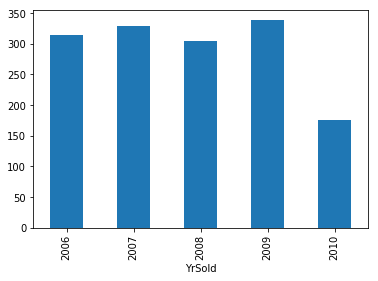

In [32]:
%pylab inline
stat.plot(kind='bar')

Populating the interactive namespace from numpy and matplotlib


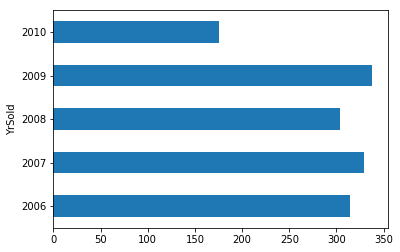

In [33]:
%pylab inline
stat.plot(kind='barh')

In [34]:
data = [go.Bar(
    x=stat.index,  
    y=stat
)]


In [35]:
pyo.iplot(data, filename='bar1.html')


In [36]:
stat = traindata.groupby(['HouseStyle','YrSold'])['Id'].count().unstack()

In [37]:
stat

YrSold       2006   2007   2008   2009  2010
HouseStyle                                  
1.5Fin       34.0   28.0   37.0   39.0  16.0
1.5Unf        1.0    7.0    3.0    3.0   NaN
1Story      151.0  167.0  146.0  167.0  95.0
2.5Fin        2.0    1.0    3.0    2.0   NaN
2.5Unf        2.0    4.0    3.0    2.0   NaN
2Story      101.0   99.0   92.0  102.0  51.0
SFoyer        8.0    9.0    5.0    9.0   6.0
SLvl         15.0   14.0   15.0   14.0   7.0

In [38]:
trace1 = go.Bar(
    x=stat.index,  
    y=stat[2006],
    name = '2006',
    marker=dict(color='#FFD700')
)

trace2 = go.Bar(
    x=stat.index,  
    y=stat[2007],
    name = '2007',
    marker=dict(color='#9EA0A1')
)


In [39]:
data = [trace1, trace2]

fig = go.Figure(data=data)
pyo.iplot(fig, filename='bar2.html')


In [40]:
data = [go.Bar(
    x=stat.index,  
    y=stat[col],
    name = str(col)
) for col in stat.columns]

In [41]:
fig = go.Figure(data=data)
pyo.iplot(fig, filename='bar2.html')

## Adobe Color Wheel
- https://color.adobe.com/zh/explore/?filter=most-popular&time=month
- https://www.rgbtohex.net/

In [42]:
?go.Bar

In [43]:
year   = [1,2,3,4]
grades = [80,82,84,88]
trace1 = go.Bar(
    x=year,  
    y=grades,
    name = 'grades'
)
data = [trace1]
pyo.iplot(data)

In [45]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [4]:
import pandas
traindata = pandas.read_csv('data/train.csv')

In [5]:
#traindata['SalePrice']

In [6]:
data = [
    go.Histogram(x = traindata['SalePrice'])
]

In [7]:
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [8]:
data = [
    go.Histogram(
        x = traindata['SalePrice'],
        xbins=dict(start=100000,end=200000,size=10000),
    )
]
pyo.plot(data)



'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [9]:
#traindata['HouseStyle'] == '1Story'

In [10]:
data = [
    go.Histogram(
        x = traindata.loc[traindata['HouseStyle'] == '1Story','SalePrice'],
        opacity=0.75,
        name = '1Story'
    ),
    go.Histogram(
        x = traindata.loc[traindata['HouseStyle'] == '2Story','SalePrice'],
        opacity=0.75,
        name = '2Story'
    )
]

In [11]:
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [63]:
layout = go.Layout(
    barmode='overlay',
    title="Price comparison by HouseStyle"
)


In [64]:
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='basic_histogram2.html')


'file:///Users/davidchiu/course/ctbc/basic_histogram2.html'

In [66]:
import plotly.figure_factory as ff

x = np.random.randn(1000)
hist_data    = [x]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='basic_distplot.html')


'file:///Users/davidchiu/course/ctbc/basic_distplot.html'

In [68]:
x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4

hist_data = [x1,x2,x3,x4]
group_labels = ['Group1','Group2','Group3','Group4']

fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='multiset_distplot.html')


'file:///Users/davidchiu/course/ctbc/multiset_distplot.html'

In [70]:
snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

hist_data = [snodgrass,twain]
group_labels = ['Snodgrass','Twain']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[.005,.005])
pyo.plot(fig, filename='SnodgrassTwainDistplot.html')


'file:///Users/davidchiu/course/ctbc/SnodgrassTwainDistplot.html'

## Pie Chart

In [74]:
stat = traindata.groupby('HouseStyle')['Id'].count()

In [76]:
data = [
    go.Pie(
        labels = stat.index,
        values = stat
    )
    
]
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [77]:
data = [
    go.Pie(
        labels = stat.index,
        values = stat,
        hole = 0.4
    )
    
]
pyo.plot(data)

'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [79]:
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]

data = [
    go.Box(
        y=y,
        boxpoints='all',
        jitter=0.3,     
        pointpos=-1.8   
    )
]
pyo.plot(data, filename='box1.html')


'file:///Users/davidchiu/course/ctbc/box1.html'

In [81]:
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]

data = [
    go.Box(
        y=y,
        boxpoints='outliers' 
    )
]
pyo.plot(data, filename='box2.html')


'file:///Users/davidchiu/course/ctbc/box2.html'

In [82]:
snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

data = [
    go.Box(
        y=snodgrass,
        name='QCS'
    ),
    go.Box(
        y=twain,
        name='MT'
    )
]
layout = go.Layout(
    title = 'Comparison of three-letter-word frequencies<br>\
    between Quintus Curtius Snodgrass and Mark Twain'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='box3.html')


'file:///Users/davidchiu/course/ctbc/box3.html'

In [15]:
traindata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
data = [go.Scatter(          
    x=traindata['GrLivArea'],
    y=traindata['SalePrice'],
    text=traindata['Id'],
    mode='markers',
    marker=dict(size=1.5*traindata['GrLivArea'] / 100)
)]

layout = go.Layout(
    title='Sale Price v.s. Living Area',
    xaxis = dict(title = 'Living Area'), 
    yaxis = dict(title = 'Sale Price'),        
    hovermode='closest'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bubble1.html')


'file:///Users/davidchiu/course/ctbc/bubble1.html'

In [28]:

stat = traindata.groupby(['HouseStyle', 'YrSold'])['SalePrice'].mean().to_frame()

In [38]:
stat2 = stat.reset_index()

In [39]:
stat2

HouseStyle  YrSold      SalePrice
0      1.5Fin    2006  132323.529412
1      1.5Fin    2007  155583.928571
2      1.5Fin    2008  156048.162162
3      1.5Fin    2009  133747.948718
4      1.5Fin    2010  137167.250000
5      1.5Unf    2006  113000.000000
6      1.5Unf    2007  111442.857143
7      1.5Unf    2008  111000.000000
8      1.5Unf    2009  105333.333333
9      1Story    2006  176085.668874
10     1Story    2007  178610.035928
11     1Story    2008  170431.938356
12     1Story    2009  177611.275449
13     1Story    2010  176889.463158
14     2.5Fin    2006  296750.000000
15     2.5Fin    2007  200000.000000
16     2.5Fin    2008  221833.333333
17     2.5Fin    2009  150500.000000
18     2.5Unf    2006  153500.000000
19     2.5Unf    2007  130225.000000
20     2.5Unf    2008  194166.666667
21     2.5Unf    2009  160250.000000
22     2Story    2006  216205.089109
23     2Story    2007  222422.737374
24     2Story    2008  201320.554348
25     2Story    2009  206467.264706
26     2Story    2010  196770.941176
27     SFoyer    2006  129495.000000
28     SFoyer    2007  133944.444444
29     SFoyer    2008  142431.800000
30     SFoyer    2009  135793.000000
31     SFoyer    2010  137000.000000
32       SLvl    2006  156428.000000
33       SLvl    2007  164585.714286
34       SLvl    2008  163080.000000
35       SLvl    2009  182250.000000
36       SLvl    2010  169628.571429

In [40]:
data = [go.Heatmap(
    x=stat2['HouseStyle'],
    y=stat2['YrSold'],
    z=stat2['SalePrice'],
    colorscale='Jet'
)]

layout = go.Layout(
    title='House Price By Year and Type'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)


'file:///Users/davidchiu/course/ctbc/temp-plot.html'

In [47]:
n = traindata[traindata['SaleCondition'] == 'Normal']
ab = traindata[traindata['SaleCondition'] == 'Abnorml']

In [48]:
n1 = n.groupby(['HouseStyle', 'YrSold'])['SalePrice'].mean().to_frame()
n1.reset_index(inplace=True)

In [49]:
ab1 = ab.groupby(['HouseStyle', 'YrSold'])['SalePrice'].mean().to_frame()
ab1.reset_index(inplace=True)

In [52]:
ab1['SalePrice'].describe()

count        23.000000
mean     144201.910606
std       45143.111507
min       89558.666667
25%      114764.500000
50%      137440.000000
75%      166950.000000
max      295400.000000
Name: SalePrice, dtype: float64

In [53]:
n1['SalePrice'].describe()

count        36.000000
mean     163838.815039
std       38543.596491
min      105333.333333
25%      134539.559387
50%      160829.272727
75%      193837.121212
max      296750.000000
Name: SalePrice, dtype: float64

In [57]:
trace1 = go.Heatmap(
    x=n1['HouseStyle'],
    y=n1['YrSold'],
    z=n1['SalePrice'],
    name = 'normal',
    colorscale='Jet',
    zmin = 0, zmax = 300000 
)
trace2 = go.Heatmap(
    x=ab1['HouseStyle'],
    y=ab1['YrSold'],
    z=ab1['SalePrice'],
    name = 'abnormal',
    colorscale='Jet',
    zmin = 0, zmax = 300000
)


In [80]:
from plotly import tools
fig = tools.make_subplots(
    rows=1, cols=2,
    subplot_titles=('Normal','Abnormal'),
    shared_yaxes = True,  
)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
pyo.iplot(fig, filename='AllHeatMap.html')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



In [59]:
import pandas
df = pandas.read_csv('data/rent_591_sample2.csv')

In [62]:
df.columns

Index(['Unnamed: 0', 'detail_url', 'search_date', 'title', 'address',
       'floor_info', 'price', 'layout', 'building_area', 'building_use',
       'latitude', 'longitude'],
      dtype='object')

In [63]:
df2  = df[['title', 'address', 'price', 'building_area', 'building_use', 'latitude', 'longitude']]

In [65]:
df2 = df2[df2['address'].str.contains('台北市')]

In [68]:
df2['price'] = df2['price'].map(lambda e: int(e.replace('元/月', '').replace(',', '')))

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [72]:
df2['btype'] = df2['building_use'].map(lambda e: str(e).split('/')[0])

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [79]:
df2.to_csv('rent_591_sample3.csv', encoding='utf-8')

## 任務: 繪製房產數據

### 讀取數據

In [82]:
import pandas
df = pandas.read_csv('data/rent_591_sample3.csv')
df.head()

Unnamed: 0                 title      address  price  building_area  \
0          11      政大靜巷優質(女)套房，可住雙人  台北市文山區指南路二段  10000           6.00   
1          15   台北市北投新民路捷運溫泉78坪雙拼美廈    台北市北投區新民路  25000          78.00   
2          20   小巨捷運敦化學區樓中樓可三代同堂兼辦公    台北市松山區北寧路  70000          66.35   
3          39   環境單純，生活機能佳，近市中心交通便利    台北市松山區吉祥路   8000           6.00   
4          65  房間分租/獨立衛浴/環境舒適~近天母三越   台北市士林區天母東路  14000          26.00   

  building_use   latitude   longitude btype  
0      公寓/獨立套房  24.988698  121.574008    公寓  
1    電梯大樓/整層住家  25.140992  121.508139  電梯大樓  
2    電梯大樓/整層住家  25.051868  121.553830  電梯大樓  
3     透天厝/分租套房  25.049546  121.562708   透天厝  
4        公寓/辦公  25.118543  121.534280    公寓

### 台北市建物類型統計長條圖

In [85]:
stat = df['btype'].value_counts()
trace = go.Bar(
    x = stat.index,
    y = stat,
    name = '建物類型'
    )
data = [trace]
pyo.iplot(data)

### 台北市建物類型統計圓餅圖

In [86]:
trace = go.Pie(
    labels = stat.index,
    values = stat,
    name = '建物類型'
    )
data = [trace]
pyo.iplot(data)

### 台北市房價箱形圖

In [92]:
import numpy
trace = go.Box(
    y = numpy.log(df['price']),
    )
data = [trace]
pyo.iplot(data)

### 根據建物類別繪製台北市房價箱形圖

In [97]:
data = []
for ele in df['btype'].unique():
    if ele:
        bplot = go.Box(
            y=numpy.log(df.loc[df['btype'] == ele, 'price']),
            name=ele
        )
        data.append(bplot)

In [98]:
fig = go.Figure(data=data)
pyo.iplot(fig)


### 台北市房價直方圖

In [101]:
trace = go.Histogram(
    x = numpy.log(df['price']),
    )
data = [trace]
pyo.iplot(data)

### 根據建物類別繪製台北市房價直方圖

In [105]:
data = []
for ele in df['btype'].unique():
    if ele:
        bplot = go.Histogram(
            x=numpy.log(df.loc[df['btype'] == ele, 'price']),
            name=ele,
            opacity=0.75,
        )
        data.append(bplot)

In [106]:
pyo.iplot(data)

In [107]:
layout = go.Layout(
    barmode='overlay',
)

In [104]:
fig = go.Figure(data= data, layout=layout)
pyo.iplot(fig)

### 根據坪數-價格繪製散佈圖

In [112]:
trace = go.Scatter(
        x = df['building_area'],
        y = df['price'],
        mode = 'markers'
    )
data = [trace]


In [113]:
pyo.iplot(data)

## 使用Dash

In [ ]:
! pip install dash
! pip install dash-html-components # HTML components
! pip install dash-core-components # Supercharged components
! pip install dash-table

### Example1

In [116]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),
    html.Div(children='Dash: A web application framework for Python.'),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])


### Example 2

In [118]:
app = dash.Dash()

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

app.layout = html.Div(children=[
    html.H1(
        children='Hello Dash',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(
        children='Dash: A web application framework for Python.',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'plot_bgcolor': colors['background'],
                'paper_bgcolor': colors['background'],
                'font': {
                    'color': colors['text']
                },
                'title': 'Dash Data Visualization'
            }
        }
    )],
    style={'backgroundColor': colors['background']}
)

### Example 3

In [120]:
app = dash.Dash()

np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

app.layout = html.Div([
    dcc.Graph(
        id='scatter3',
        figure={
            'data': [
                go.Scatter(
                    x = random_x,
                    y = random_y,
                    mode = 'markers',
                    marker = {
                        'size': 12,
                        'color': 'rgb(51,204,153)',
                        'symbol': 'pentagon',
                        'line': {'width': 2}
                        }
                )
            ],
            'layout': go.Layout(
                title = 'Random Data Scatterplot',
                xaxis = {'title': 'Some random x-values'},
                yaxis = {'title': 'Some random y-values'},
                hovermode='closest'
            )
        }
    )
])

### Example 4

In [122]:
app = dash.Dash()

# Creating DATA
np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

app.layout = html.Div([dcc.Graph(id='scatterplot',
                    figure = {'data':[
                            go.Scatter(
                            x=random_x,
                            y=random_y,
                            mode='markers',
                            marker = {
                                'size':12,
                                'color': 'rgb(51,204,153)',
                                'symbol':'pentagon',
                                'line':{'width':2}
                            }
                            )],
                    'layout':go.Layout(title='My Scatterplot',
                                        xaxis = {'title':'Some X title'})}
                    ),
                    dcc.Graph(id='scatterplot2',
                                        figure = {'data':[
                                                go.Scatter(
                                                x=random_x,
                                                y=random_y,
                                                mode='markers',
                                                marker = {
                                                    'size':12,
                                                    'color': 'rgb(200,204,53)',
                                                    'symbol':'pentagon',
                                                    'line':{'width':2}
                                                }
                                                )],
                                        'layout':go.Layout(title='Second Plot',
                                                            xaxis = {'title':'Some X title'})}
                                        )])

### Example 6

In [124]:
app = dash.Dash()

app.layout = html.Div([

    # DROPDOWN https://dash.plot.ly/dash-core-components/dropdown
    html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': 'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),

    html.Label('Multi-Select Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value=['MTL', 'SF'],
        multi=True
    ),

    # SLIDER https://dash.plot.ly/dash-core-components/slider
    html.Label('Slider'),
    html.P(
    dcc.Slider(
        min=-5,
        max=10,
        step=0.5,
        marks={i: i for i in range(-5,11)},
        value=-3
    )),

    # RADIO ITEMS https://dash.plot.ly/dash-core-components/radioitems
    html.Label('Radio Items'),
    dcc.RadioItems(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': 'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    )
], style={'width': '50%'})

### Example 7
- http://www.w3school.com.cn/
- https://www.w3schools.com/css/

In [126]:
import dash
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div([
    'This is the outermost Div',
    html.Div(
        'This is an inner Div',
        style={'color':'blue', 'border':'2px blue solid', 'borderRadius':5,
        'padding':10, 'width':220}
    ),
    html.Div(
        'This is another inner Div',
        style={'color':'green', 'border':'2px green solid',
        'margin':10, 'width':220}
    ),
],
# this styles the outermost Div:
style={'width':500, 'height':200, 'color':'red', 'border':'2px red dotted'})


### Example 8
- https://markdown.tw/

In [128]:
app = dash.Dash()

markdown_text = '''
### Dash and Markdown
Dash apps can be written in Markdown.
Dash uses the [CommonMark](http://commonmark.org/) specification of Markdown.
Check out their [60 Second Markdown Tutorial](http://commonmark.org/help/)
if this is your first introduction to Markdown!
Markdown includes syntax for things like **bold text** and *italics*,
[links](http://commonmark.org/help), inline `code` snippets, lists,
quotes, and more.
'''

app.layout = html.Div([
    dcc.Markdown(children=markdown_text)
])

### Example 9

In [131]:
from dash.dependencies import Input, Output
app = dash.Dash()

app.layout = html.Div([
    dcc.Input(id='my-id', value='initial value', type='text'),
    html.Div(id='my-div')
])

@app.callback(
    Output(component_id='my-div', component_property='children'),
    [Input(component_id='my-id', component_property='value')]
)
def update_output_div(input_value):
    return 'You\'ve entered "{}"'.format(input_value)

### Example 10

In [133]:
df = pandas.read_csv('data/rent_591_sample3.csv')

In [134]:
df.head()

Unnamed: 0                 title      address  price  building_area  \
0          11      政大靜巷優質(女)套房，可住雙人  台北市文山區指南路二段  10000           6.00   
1          15   台北市北投新民路捷運溫泉78坪雙拼美廈    台北市北投區新民路  25000          78.00   
2          20   小巨捷運敦化學區樓中樓可三代同堂兼辦公    台北市松山區北寧路  70000          66.35   
3          39   環境單純，生活機能佳，近市中心交通便利    台北市松山區吉祥路   8000           6.00   
4          65  房間分租/獨立衛浴/環境舒適~近天母三越   台北市士林區天母東路  14000          26.00   

  building_use   latitude   longitude btype  
0      公寓/獨立套房  24.988698  121.574008    公寓  
1    電梯大樓/整層住家  25.140992  121.508139  電梯大樓  
2    電梯大樓/整層住家  25.051868  121.553830  電梯大樓  
3     透天厝/分租套房  25.049546  121.562708   透天厝  
4        公寓/辦公  25.118543  121.534280    公寓

In [135]:
df['btype'].unique()

array(['公寓', '電梯大樓', '透天厝', nan, '倉庫', '別墅', '廠辦'], dtype=object)

In [146]:
app = dash.Dash()

btype_options = []
for btype in df['btype'].unique():
    if pandas.isnull(btype) == False:
        btype_options.append({'label':btype,'value':btype})

app.layout = html.Div([
    dcc.Graph(id='graph'),
    dcc.Dropdown(id='btype-picker',options=btype_options,value='公寓')
])

In [147]:
@app.callback(Output('graph', 'figure'),
              [Input('btype-picker', 'value')])
def update_figure(selected_btype):
    filtered_df = df[df['btype'] == selected_btype]
    traces = []
    traces.append(go.Scatter(
            x=filtered_df['building_area'],
            y=filtered_df['price'],
            text=filtered_df['address'],
            mode='markers',
            opacity=0.7,
            marker={'size': 15},
            name=selected_btype
    ))

    return {
        'data': traces,
        'layout': go.Layout(
            xaxis={'title': 'Area'},
            yaxis={'title': 'Price'},
            hovermode='closest'
        )
    }

In [148]:
app.run_server(port=8080)

 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Nov/2018 16:27:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:05] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:45] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2018 16:27:49] "POST /_dash-update-component HTTP/1.1" 200 -
